In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import csv
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import string
%matplotlib inline

In [207]:
with open("sentiment-analysis-on-movie-reviews/train.tsv") as train_file: 
    tsv_reader = csv.DictReader(train_file,delimiter="\t")
    reviews = []
    for review in tsv_reader:
        reviews.append(review)
    reviews_df = pd.DataFrame(reviews)

In [208]:
imdb = pd.read_csv("IMDB Dataset.csv")
imdb['sentiment'] = imdb['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [209]:
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [210]:
train = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv",delimiter="\t")
test = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv",delimiter="\t")

In [211]:
train["Sentiment"].value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

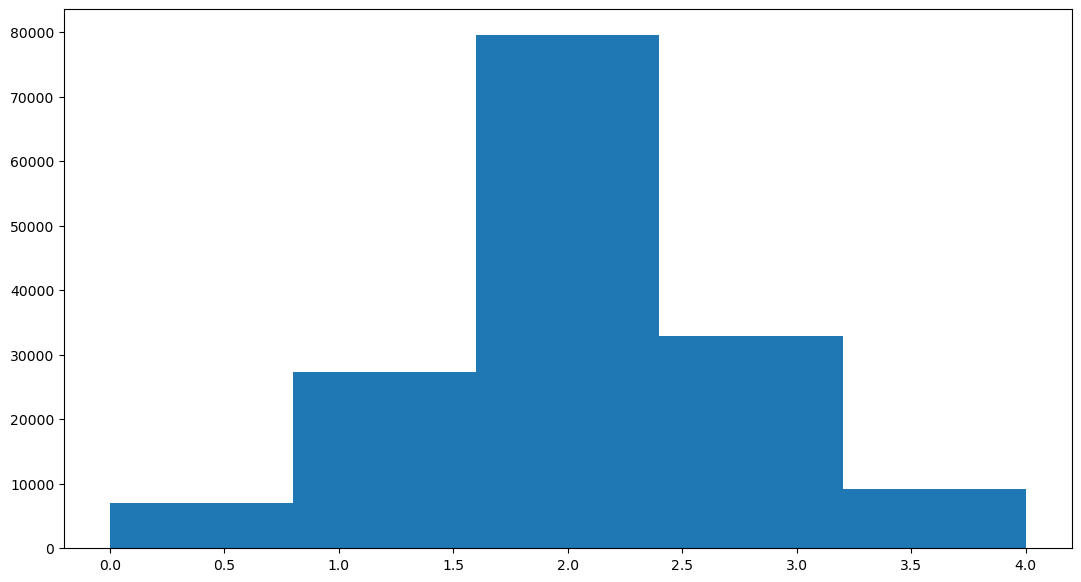

In [212]:
plt.rcParams['figure.figsize'] = (13, 7)

plt.hist(list(train["Sentiment"]),bins=len(train["Sentiment"].unique()));


In [215]:


def cleaning(text):
    # Lowercase conversion and URL removal
    text = str(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r"\b\d+\b", "", text)  # Remove numbers
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newlines
    text = re.sub('[’“”…]', '', text)  # Remove special characters

    # Removing emoji
    emoji_pattern = re.compile(
        u"[" 
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)  # Remove emojis

    # Define a dictionary for contractions
    contractions = {
        "isn't": 'is not', "he's": 'he is', "wasn't": 'was not', "there's": 'there is',
        "couldn't": 'could not', "won't": 'will not', "they're": 'they are', "she's": 'she is',
        "wouldn't": 'would not', "haven't": 'have not', "that's": 'that is', "you've": 'you have',
        "what's": 'what is', "weren't": 'were not', "we're": 'we are', "hasn't": 'has not',
        "you'd": 'you would', "shouldn't": 'should not', "let's": 'let us', "they've": 'they have',
        "you'll": 'you will', "i'm": 'i am', "we've": 'we have', "it's": 'it is', "don't": 'do not',
        "that´s": 'that is', "i´m": 'i am', "it’s": 'it is', "she´s": 'she is', "he’s'": 'he is',
        "I’m": 'I am', "I’d": 'I did', "he’s'": 'he is', "there’s": 'there is'
    }

    # Replace contractions using the dictionary
    for short, full in contractions.items():
        text = text.replace(short, full)

    return text

def preprocess_text(df,column_name="Phrase",n_freq_words=10):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    # Apply the cleaning function to the 'text' column
    cleaned = df[column_name].apply(cleaning)
    lemmatized = cleaned.apply(lambda i: lemmatizer.lemmatize(str(i)))# for i in x])
    stemmed = lemmatized.apply(lambda i: stemmer.stem(i)) # for i in x])
    df['Lemmatized'] = lemmatized
    df['Stemmed'] = stemmed

    if n_freq_words > 0:
        cnt = Counter()
        for text in df[column_name].values:
            for word in text.split():
                cnt[word] += 1
        FREQWORDS = set([w for (w, wc) in cnt.most_common(n_freq_words)])
        df['Removed Frequent Words'] = 


In [216]:
preprocess_text(train)
preprocess_text(test)

preprocess_text(imdb,"review")

In [218]:

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
train["Lemmatized"] = train["Lemmatized"].apply(lambda text: remove_freqwords(text))
imdb["Lemmatized"].apply(lambda x: remove_freqwords(x))

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought was a wonderful way to spend time on...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought did a down right good job it wasnt c...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree the previous comm...
49999    no one expects the star trek movies to high ar...
Name: Lemmatized, Length: 50000, dtype: object

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

token = nltk.RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1))
reviews = cv.fit_transform(train['Lemmatized'])

In [195]:
from sklearn.feature_extraction.text import CountVectorizer

token = nltk.RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1))
reviews_imdb = cv.fit_transform(train_imdb['Lemmatized'])

In [197]:
X_train,X_val,y_train,y_val = train_test_split(reviews_imdb,train_imdb['sentiment'],test_size=0.2,random_state=42)

In [200]:
from sklearn.naive_bayes import ComplementNB,MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

model = ComplementNB()
model.fit(X_train,y_train)

from sklearn import metrics

y_pred = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val,y_pred)

In [201]:
accuracy

0.856

In [ ]:
from torch.nn import LSTM
lstm = LSTM()